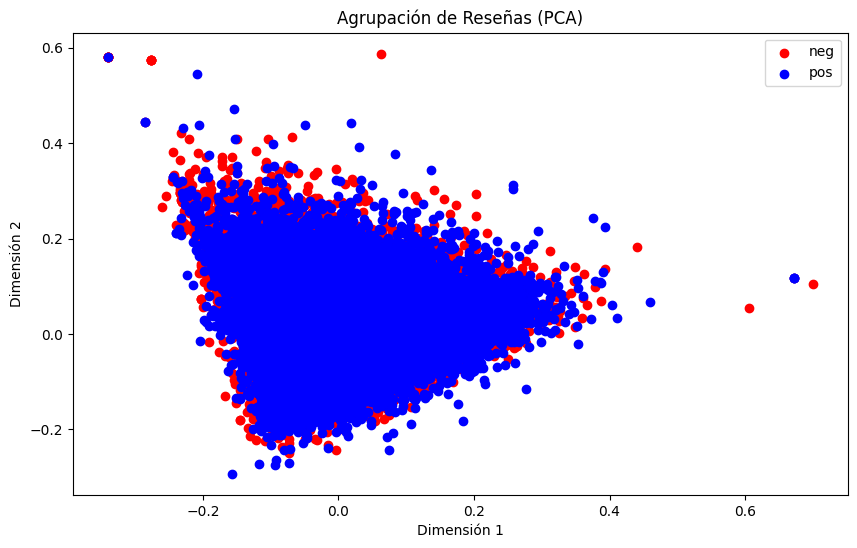

Precisión del modelo: 0.5268077873918418


In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA # Importar PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos (igual que en el ejemplo anterior)
data = pd.read_csv("movie_review.csv")
X = data['text']
y = data['tag']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenar un modelo de clasificación (usar K-Nearest Neighbors en lugar de Naive Bayes)
k = 5 # Número de vecinos cercanos a considerar (puedes ajustarlo según tus necesidades)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

# Reducción de dimensionalidad con PCA (para visualización)
pca = PCA(n_components=2) # Reducir a solo 2 dimensiones para la visualización
X_train_pca = pca.fit_transform(X_train.toarray())

# Visualización de la agrupación en un gráfico de dispersión
plt.figure(figsize=(10, 6))
colors = {'pos': 'b', 'neg': 'r'}  # Asigna los colores según tus etiquetas
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices[0], 0], X_train_pca[indices[0], 1], c=colors[label], label=label)

plt.title('Agrupación de Reseñas (PCA)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)